In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import itertools
import pylab as pl

from sklearn.cluster import KMeans
from sklearn import metrics, linear_model
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer 
from sklearn.naive_bayes import GaussianNB
import datetime
import plotly.express as px

In [78]:
df = pd.read_json("ultimate_data_challenge.json")

In [79]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [81]:
df.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25,2014-01-29,2014-01-06,2014-01-10,2014-01-27
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4
avg_surge,1.1,1.0,1.0,1.14,1.19
last_trip_date,2014-06-17,2014-05-05,2014-01-07,2014-06-29,2014-03-15
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0.0,0.0,20.0,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50.0,100.0,80.0,82.4


In [82]:
#data cleaning: missing values then deleting them
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [83]:
df.dropna(inplace=True)
print(df.isnull().sum())

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


In [84]:
#data explore 
print(df.corr())

                        trips_in_first_30_days  avg_rating_of_driver  \
trips_in_first_30_days                1.000000             -0.011849   
avg_rating_of_driver                 -0.011849              1.000000   
avg_surge                            -0.000262             -0.022209   
surge_pct                             0.005370             -0.001696   
ultimate_black_user                   0.115066             -0.003292   
weekday_pct                           0.055556              0.012975   
avg_dist                             -0.136471              0.034877   
avg_rating_by_driver                 -0.045788              0.122413   

                        avg_surge  surge_pct  ultimate_black_user  \
trips_in_first_30_days  -0.000262   0.005370             0.115066   
avg_rating_of_driver    -0.022209  -0.001696            -0.003292   
avg_surge                1.000000   0.795737            -0.070613   
surge_pct                0.795737   1.000000            -0.099814   
ultima

C:\Users\Mtize\AppData\Local\Temp\ipykernel_24072\2861733862.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


C:\Users\Mtize\AppData\Local\Temp\ipykernel_24072\791426744.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


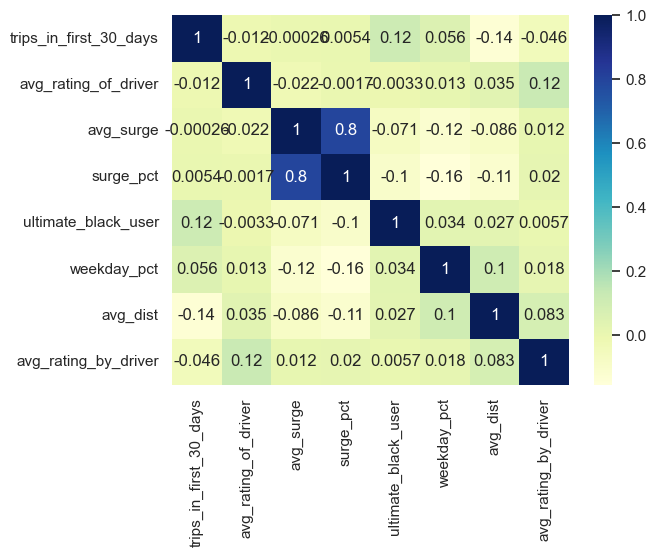

In [85]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 

In [86]:
corr_matrix = df.corr()['weekday_pct']
print(corr_matrix)

trips_in_first_30_days    0.055556
avg_rating_of_driver      0.012975
avg_surge                -0.118999
surge_pct                -0.155179
ultimate_black_user       0.033964
weekday_pct               1.000000
avg_dist                  0.102048
avg_rating_by_driver      0.018312
Name: weekday_pct, dtype: float64


C:\Users\Mtize\AppData\Local\Temp\ipykernel_24072\2614219695.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()['weekday_pct']


In [87]:
corr_matrix.sort_values(ascending = False)

weekday_pct               1.000000
avg_dist                  0.102048
trips_in_first_30_days    0.055556
ultimate_black_user       0.033964
avg_rating_by_driver      0.018312
avg_rating_of_driver      0.012975
avg_surge                -0.118999
surge_pct                -0.155179
Name: weekday_pct, dtype: float64

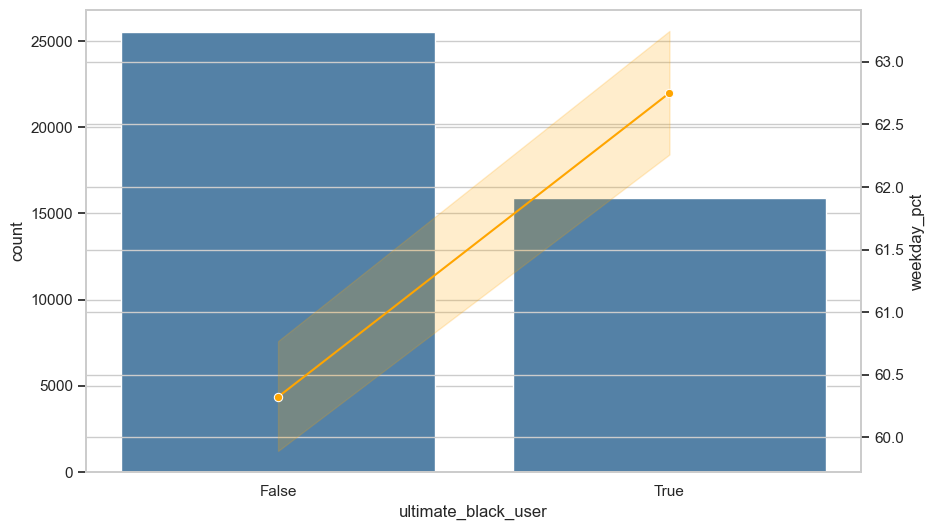

In [88]:
#combo bar and line plot of week_pct and ultimate black user
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count
sns.countplot(x="ultimate_black_user", data=df, ax=ax1, color='steelblue')

# Line plot for average value
ax2 = ax1.twinx()
sns.lineplot(x="ultimate_black_user", y="weekday_pct", data=df, ax=ax2, color='orange', marker='o')

# Show the plot
plt.show()

<Axes: xlabel='trips_in_first_30_days', ylabel='weekday_pct'>

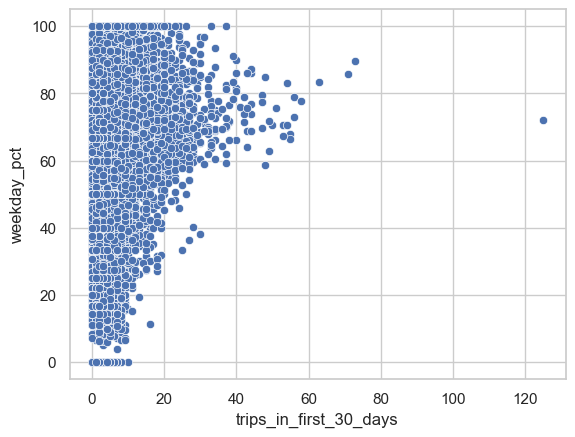

In [89]:
sns.scatterplot(data=df, x="trips_in_first_30_days", y="weekday_pct")

<Axes: xlabel='avg_dist', ylabel='weekday_pct'>

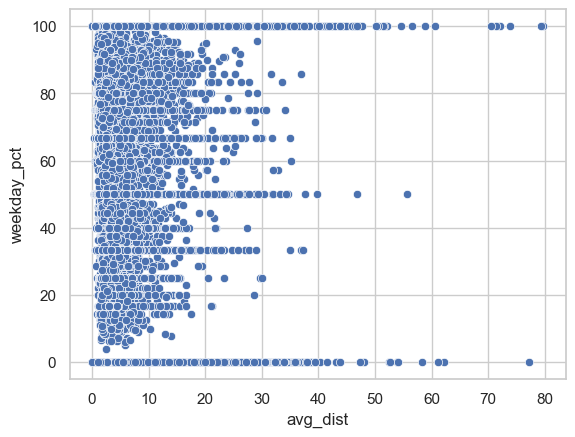

In [90]:
sns.scatterplot(data=df, x="avg_dist", y="weekday_pct")

In [91]:
select_columns = ['avg_dist', 'trips_in_first_30_days', 'ultimate_black_user']
X = df[select_columns] 
target = 'weekday_pct'
y = df[target]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [93]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns 
categorical_features = X.select_dtypes(include=['object']).columns 

In [94]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_features)]), 'cat', categorical_features

In [95]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred = reg.predict(X_test)

In [100]:
print(metrics.classification_report(y_test,y_pred))

ValueError: continuous is not supported